# Classificação de Textos do Twitter com spaCy

# Etapa 1: Importação e instalação das bibliotecas

In [1]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np
import re

In [2]:
spacy.__version__

'2.2.3'

# Etapa 2: Carregamento das bases de dados

- Link Kaggle: https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis#TweetsNeutralHash.csv

## Base de treinamento
* Negative label: 0
* Positive label: 1

In [3]:
df_train = pd.read_csv('CSVs/Train50.csv', delimiter=';')
df_train.shape

(50000, 5)

In [4]:
df_train.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


In [5]:
df_train.tail()

,id,tweet_text,tweet_date,sentiment,query_used
49995,1046762827053232128,:( é tão lindo que dói https://t.co/GqnpgyWWxB,Mon Oct 01 14:04:40 +0000 2018,0,:(
49996,1046762813362966529,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",Mon Oct 01 14:04:37 +0000 2018,0,:(
49997,1046762806392082432,eu te amo tanto minja vidinha meu bem mais pre...,Mon Oct 01 14:04:35 +0000 2018,0,:(
49998,1046762752071618560,@itsLary @jessboluda Pfvor :(,Mon Oct 01 14:04:22 +0000 2018,0,:(
49999,1046762735340584962,@Renk_lol Passa ano Entra ano Eu nao desisto d...,Mon Oct 01 14:04:18 +0000 2018,0,:(


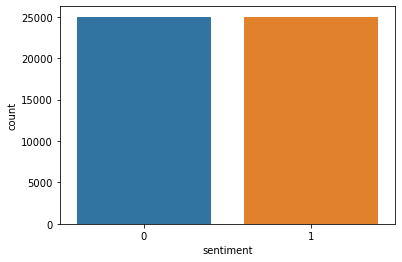

In [8]:
sns.countplot(x = 'sentiment', data = df_train, label = 'Contagem');

In [9]:
df_train.drop(['id','tweet_date','query_used'], axis = 1, inplace = True)
df_train.head()

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


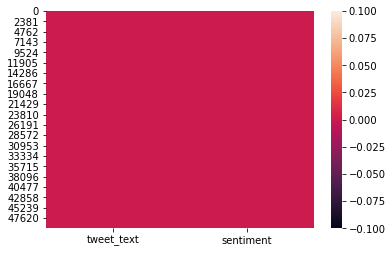

In [15]:
sns.heatmap(pd.isnull(df_train));

## Base de teste

In [11]:
df_test = pd.read_csv('CSVs/Test.csv', delimiter = ';')
df_test.shape

(5000, 5)

In [12]:
df_test.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)


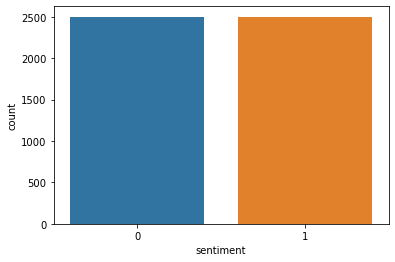

In [13]:
sns.countplot(x='sentiment', data=df_test, label='Contagem');

In [14]:
df_test.drop(['id','tweet_date','query_used'], axis=1, inplace=True)
df_test.head()

,tweet_text,sentiment
0,@Gazo1a Nossa! Muito obrigada :),1
1,@BerzGamer vai pa puta que te pariu :),1
2,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,1
3,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",1
4,Estávamos em casa do Zé e eu estava a morrer d...,1


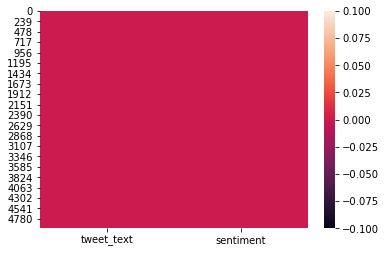

In [16]:
sns.heatmap(pd.isnull(df_test));

# Etapa 3: Função para pré-processamento dos textos

- Letras minúsculas
- Nome do usuário (@)
- URLs
- Espaços em branco
- Emoticons
- Stop words
- Lematização
- Pontuações

In [17]:
pln = spacy.load('pt')
pln

In [18]:
df_train['tweet_text'][1]

'@behin_d_curtain Para mim, é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'

In [19]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS

In [20]:
print(stop_words)

{'momento', 'sabe', 'vinte', 'fui', 'contra', 'menos', 'favor', 'quatro', 'quanto', 'custa', 'com', 'ambos', 'elas', 'inicio', 'desse', 'dá', 'nesta', 'muito', 'grandes', 'exemplo', 'num', 'umas', 'meus', 'então', 'certamente', 'falta', 'se', 'já', 'des', 'nossas', 'tiveram', 'forma', 'tipo', 'quinta', 'dentro', 'obrigado', 'nada', 'talvez', 'estará', 'sob', 'novo', 'vão', 'próprio', 'isto', 'como', 'agora', 'nem', 'das', 'podia', 'nenhuma', 'quando', 'terceiro', 'vós', 'do', 'nunca', 'seis', 'aqui', 'aos', 'as', 'mês', 'duas', 'da', 'mesmo', 'quarta', 'cá', 'para', 'muitos', 'dezasseis', 'três', 'possivelmente', 'final', 'outros', 'de', 'estas', 'grupo', 'poderá', 'porém', 'ali', 'pelas', 'cuja', 'fazes', 'te', 'esses', 'os', 'estado', 'tive', 'máximo', 'tentaram', 'direita', 'ligado', 'vos', 'for', 'esta', 'dezanove', 'bem', 'qualquer', 'minha', 'mal', 'último', 'querem', 'sois', 'seu', 'pelos', 'inclusive', 'deverá', 'próximo', 'são', 'sexta', 'esse', 'geral', 'quieta', 'conhecida',

In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
def preprocess(texto:str)->str:
    
    # Letras minúsculas
    texto = texto.lower()
    
    # Nome do usuário
    texto = re.sub(r'@[A-Za-z0-9$-_@.&+]+', ' ', texto)
    
    # URLs
    texto = re.sub(r'https?://[A-Za-z0-9./]+', ' ', texto)
    
    # Espaço em branco
    texto = re.sub(r' +',' ', texto)
    
    # Emotions
    dct_emocoes = {':)':'emocaopositiva',
                  ':d':'emocaopositiva',
                  ':(':'emocaonegativa'}
    
    for emocao in dct_emocoes:
        texto = texto.replace(emocao, dct_emocoes[emocao])
        
    # Lematização
    documento = pln(texto)
    lst = []
    for token in documento:
        lst.append(token.lemma_)
    
    # Stop words e pontuações
    lst = [word for word in lst if word not in stop_words and word not in string.punctuation]
    lst = ' '.join([str(el) for el in lst if not el.isdigit()])
    
    return lst

In [48]:
texto_test = '@behin_d_curtain :D Para :( mim, http://www.iaexperts.com.br é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'
result = preprocess(texto_test)
result

'  emocaopositiva parir emocaonegativa mim precisamente o contrário emocaopositiva vir o chuva e vir o disposição emocaopositiva'

# Etapa 4: Pré-processamento da base de dados

## Limpeza dos dados

In [49]:
df_train.head(10)

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1
5,@KingJokerLeto mas amiga eu to aqui ainda :),1
6,"@RivasJairo Bravo, Jairo!!! :)))",1
7,@inquilinasls @Spotify socorro ksoaksosks acho...,1
8,"@chimekarlla gosto muito de fazenda :) , mas m...",1
9,Amanha vou ver venom :D,1


In [51]:
df_train['tweet_text'] = df_train['tweet_text'].apply(preprocess)
df_train.head(10)

,tweet_text,sentiment
0,o pessoa certo parir seriar o valer e azeved...,1
1,parir mim precisamente o contrário emocaopos...,1
2,video hoje ... pensar falar sobrar o meter csg...,1
3,aaaaaaaa amar polaroids expressar o quantum to...,1
4,valorizar o coração menino vc diferente o sorr...,1
5,amigo to emocaopositiva,1
6,bravo jairo emocaopositiva,1
7,socorrer ksoaksosks achar to o caixa som :p,1
8,gostar fazenda emocaopositiva morrer medo ga...,1
9,amanhar venom emocaopositiva,1


In [53]:
df_test['tweet_text'] = df_test['tweet_text'].apply(preprocess)
df_test.head()

,tweet_text,sentiment
0,obrigar emocaopositiva,1
1,pa puta parir emocaopositiva,1
2,querer desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 conferir o l...,1
3,vcs ajudar galera pelar amor butera emocaoposi...,1
4,casar zé e o morrer sono chegar o casar e fica...,1


In [54]:
exemplo_data = [['este trabalho é agradável',{'POSITVO':True, 'NEGATIVO':False}],
                 ['este lugar continua assustador',{'POSITIVO':False,'NEGATIVO':True}]]

In [56]:
X_train = []

for texto, emocao in zip(df_train['tweet_text'], df_train['sentiment']):
    #print(texto, emocao)
    dct_classe = ({'POSITIVO':emocao==1, 'NEGATIVO':emocao==0})
    
    X_train.append([texto, dct_classe.copy()])

In [57]:
len(X_train)

50000

In [58]:
X_train[10:15]

[['simplesmente o deixar chatear querer muitooo e iludir emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['o comedir umar rotina e perfeitamente parir consolidar o escola condução :p',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['amigar parecer apaixonar vc — recíproco emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['  gajar bacano aleijar esperar e o silvar feliz emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['tou o video cabra bebé emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}]]

In [61]:
X_train[-5:]

[['emocaonegativa lindar doer', {'POSITIVO': False, 'NEGATIVO': True}],
 ['  .. problema c/ .. toc emocaonegativa o entanto o real precisar evitar q o fixar ilimitado ano atrás&amp;do queixar .. entrar o combo amp;o fixar operador .. tsc ..',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['amar minja vida precioso desculpar umar mau utted amar palavra capaz explicar o tamanho amor sentir ti emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['  pfvor emocaonegativa', {'POSITIVO': False, 'NEGATIVO': True}],
 ['  passar ano entrar ano nao desistir o emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}]]

# Etapa 5: Criação do classificador

In [62]:
model = spacy.blank('pt')
labels = model.create_pipe('textcat')
labels.add_label('POSITIVO')
labels.add_label('NEGATIVO')
model.add_pipe(labels)
historico = []

In [67]:
model.begin_training()

for epoca in range(20):
    
    random.shuffle(X_train)
    losses = {}
    
    for batch in spacy.util.minibatch(X_train, 512):
        
        textos = [model(texto) for texto, entities in batch]
        annotations = [{'cats':entities} for texto, entities in batch]
        model.update(textos, annotations, losses=losses)
        historico.append(losses)
        
    if epoca % 5 == 0:
        print(losses)

{'textcat': 1.4446945419549495e-06}
{'textcat': 3.286602096911576e-07}
{'textcat': 3.015838398213739e-07}
{'textcat': 1.9293234518548603e-07}


In [68]:
historico_loss = []
for i in historico:
    historico_loss.append(i.get('textcat'))
    
historico_loss = np.array(historico_loss)
historico_loss

array([7.85530514e-05, 7.85530514e-05, 7.85530514e-05, ...,
       7.51950656e-08, 7.51950656e-08, 7.51950656e-08])

Text(0, 0.5, 'Erro')

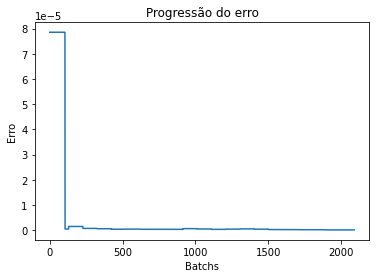

In [69]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Batchs')
plt.ylabel('Erro')
plt.show()

In [70]:
model.to_disk('model_tweet')

# Etapa 6: Testes com uma frase

## Texto positivo

In [71]:
model_loaded = spacy.load('model_tweet')
model_loaded

In [73]:
texto_positivo = df_test['tweet_text'][21]
texto_positivo

'  ficar feliz q recíproco emocaopositiva'

In [76]:
previsao = model_loaded(texto_positivo)
previsao.cats

{'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05}

In [77]:
texto_positivo = 'eu gosto muito de você'
texto_positivo = preprocess(texto_positivo)
texto_positivo

'gostar'

In [78]:
model_loaded(texto_positivo).cats

{'POSITIVO': 0.9999545812606812, 'NEGATIVO': 0.000198523688595742}

## Texto negativo

In [79]:
df_test['tweet_text'][4000]

'tô triste filmar mulan o mushu emocaonegativa'

In [80]:
texto_negativo = df_test['tweet_text'][4000]
previsao = model_loaded(texto_negativo)
previsao.cats

{'POSITIVO': 0.0008649962837807834, 'NEGATIVO': 0.9994137287139893}

# Etapa 7: Avaliação do modelo

## Avaliação na base de dados treinamento

In [81]:
previsoes = []
for texto in df_train['tweet_text']:
    #print(texto)
    previsao = model_loaded(texto)
    previsoes.append(previsao.cats)
    
previsoes

[{'POSITIVO': 0.999921441078186, 'NEGATIVO': 0.000124194091768004},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999158382415771, 'NEGATIVO': 0.0001401378831360489},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.934837488690391e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.999954

In [82]:
previsoes_final = []
for previsao in previsoes:
    if previsao['POSITIVO'] > previsao['NEGATIVO']:
        previsoes_final.append(1)
    else:
        previsoes_final.append(0)
        
previsoes_final = np.array(previsoes_final)

previsoes_final

array([1, 1, 1, ..., 0, 0, 0])

In [83]:
respostas_reais = df_train['sentiment'].values
respostas_reais

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

0.99992

In [85]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[24997,     3],
       [    1, 24999]], dtype=int64)

<AxesSubplot:>

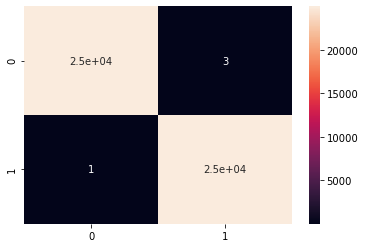

In [86]:
sns.heatmap(cm, annot=True)

## Avaliação na base de teste

In [87]:
previsoes = []
for texto in df_test['tweet_text']:
    #print(texto)
    previsao = model_loaded(texto)
    previsoes.append(previsao.cats)
    
previsoes

[{'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9992771744728088, 'NEGATIVO': 0.0011294821742922068},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 5.4172796808416024e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.9999545812606812, 'NEGATIVO': 4.539787187241018e-05},
 {'POSITIVO': 0.999

In [88]:
previsoes_final = []
for previsao in previsoes:
    if previsao['POSITIVO'] > previsao['NEGATIVO']:
        previsoes_final.append(1)
    else:
        previsoes_final.append(0)
        
previsoes_final = np.array(previsoes_final)

previsoes_final

array([1, 1, 1, ..., 0, 0, 0])

In [91]:
respostas_reais = df_test['sentiment'].values
respostas_reais

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [92]:
accuracy_score(respostas_reais, previsoes_final)

0.9974

In [93]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[2493,    7],
       [   6, 2494]], dtype=int64)

<AxesSubplot:>

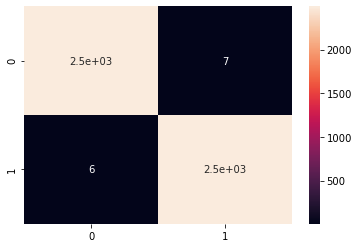

In [94]:
sns.heatmap(cm, annot=True)